### K-MEANS кластеризация

Алгоритм очень простой

* задаем k - на сколько кластеров хотим разбить данные
* R - это расстояние между точками в пространсве n признаков, которыми обладают данные
* Выбираем k случайных объектов в данных (записей) - первые элементы новых кластеров
* Для каждой записи считаем R до каждого кластера. Расстояние считается до центроида кластера, а центроид определяться может по-разному:
    * как среднее значение в кластере (покоординатно просто) 
    * как медианное значение в кластере
* Присваем записи кластер до которого расстояние минимально
* Повторяем алгоритм пока результат по всем записям не повториться (никакой объект не изменит кластер)
* делаем еще сколько-то итераций алгоритма, чтобы первые выбранные k элементов попались другие
* Выбираем вариант где сумма по всем кластерам расстояний внутри класетров до своих центроидов минимальна

In [1]:
# импортируем библиотеку pandas для работы с датафреймами
import pandas as pd
# импортируем seaborn для визуализации
import seaborn as sns
# импортируем sklearn для кластеризации
from sklearn.cluster import KMeans 

# загружаем данные
df = pd.read_csv('pokemon.csv')
# датасет содержит название покемона, уровень его защиты, силу атаки и скорость
df.head()

,Name,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,RealClusters
0,Bulbasaur,318,45,77.634658,50.854702,65,65,45,2
1,Ivysaur,405,60,67.454273,39.202323,80,80,60,1
2,Venusaur,525,80,76.007423,47.605846,100,100,80,2
3,VenusaurMega Venusaur,625,80,77.828031,50.744911,122,120,80,2
4,Charmander,309,39,68.658104,37.890027,60,50,65,1


<AxesSubplot: xlabel='Attack', ylabel='Defense'>

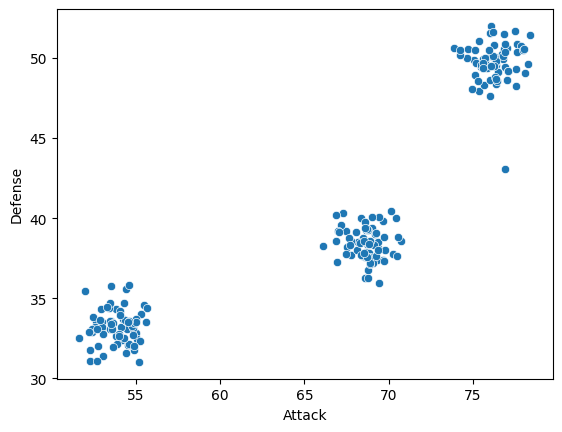

In [2]:
# попробуем кластеризовать покемонов по их силе атаки и уровню защиты
# для этого сохраним в матрицу X два интересующих нас признака: атаку и защиту
X = df[['Attack', 'Defense']]

#визуализируем
sns.scatterplot(x=X['Attack'],y=X['Defense'])

Из получившегося графика непонятно, сколько кластеров должно быть и как их выбрать. Попробуем разделить данные на три кластера.

Инициализируем алгоритм k-means. При инициализации зададим параметры моделирования:

* n_clusters — количество кластеров;
* init — стратегия кластеризации;
* n_init — количество запусков алгоритма k-means;
* random_state — чтобы результаты воспроизводились от запуска к запуску.

<AxesSubplot: xlabel='Attack', ylabel='Defense'>

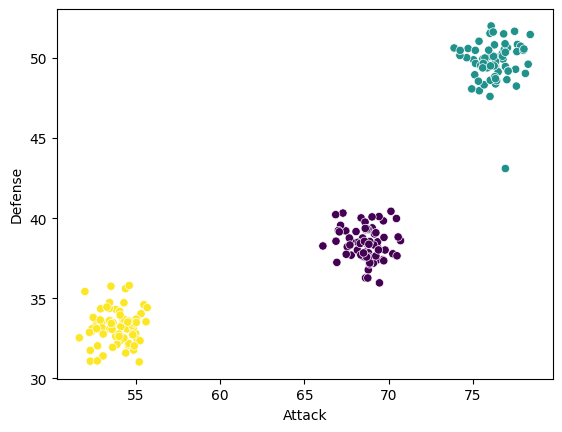

In [3]:
# инициализируем алгоритм k-means с количеством кластеров 3
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=42)

# запустим обучение модели
kmeans.fit(X)

# предскажем, к какому кластеру принадлежат покемоны 
predictions = kmeans.predict(X)
# если мы хотим получить метки класса для тех же данных, на которых обучили модель, можно запросить labels
predictions = kmeans.labels_

# сохраним предсказания в датафрейм
df['Clusters_k3'] = predictions

#визуализируем результаты. Параметр c принимает вектор с номерами классов для группировки объектов по цветам 
sns.scatterplot(x=df.Attack, y=df.Defense, c=predictions)

Попробуем увеличить количество кластеров до четырёх, чтобы вынести выброс в отдельный кластер:

<AxesSubplot: xlabel='Attack', ylabel='Defense'>

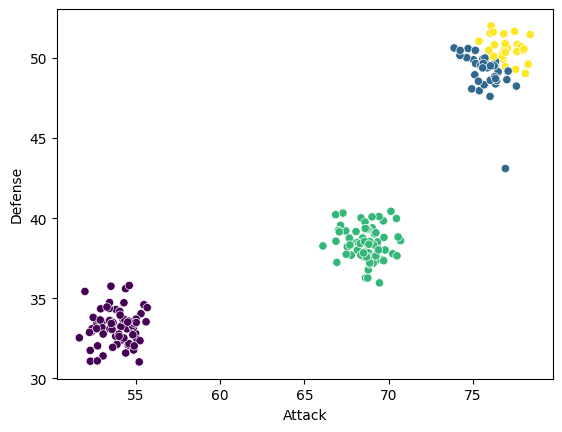

In [4]:
# инициализируем алгоритм k-means с количеством кластеров 3
kmeans = KMeans(n_clusters=4, init='k-means++', n_init=10, random_state=42)

# запустим обучение модели
kmeans.fit(X)

# предскажем, к какому кластеру принадлежат покемоны 
predictions = kmeans.predict(X)
# если мы хотим получить метки класса для тех же данных, на которых обучили модель, можно запросить labels
predictions = kmeans.labels_

# сохраним предсказания в датафрейм
df['Clusters_k4'] = predictions

#визуализируем результаты. Параметр c принимает вектор с номерами классов для группировки объектов по цветам 
sns.scatterplot(x=df.Attack, y=df.Defense, c=predictions)

Как видим, «отделить» выброс от других данных не получается: k-means не умеет обрабатывать выбросы.

In [5]:
# добавляем третий признак — скорость покемона, алгоритм такой же
#X = df[['Defense', 'Speed']]
 
# инициализируем алгоритм k-means с количеством кластеров 3
#kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=42)
 
# запускаем обучение модели
#kmeans.fit(X)
 
# предсказываем, к какому кластеру принадлежат покемоны 
#predictions = kmeans.predict(X)
#predictions = kmeans.labels_

#X['class'] = predictions 

In [6]:
#import plotly.express as px

#fig = px.scatter(X, x='Speed', y='Defense',
#              color='class')
#fig.show()

**НЕДОСТАТКИ АЛГОРИТМА K-MEANS**

* Необходимо заранее знать, на сколько кластеров мы хотим разделить данные. В учебных примерах известно, каким должно быть k, и определить это значение довольно легко. В реальности данные сложнее и трудно заранее предугадать, сколько кластеров мы хотим получить.

* Очевидно, что для объектов, которые в равной степени принадлежат к разным кластерам, алгоритм k-means будет отрабатывать плохо.

* Алгоритм чувствителен к выбросам в данных, так как выбросы сильно искажают местонахождение центроида кластера.

* Плохо работает на данных, которые образуют удлинённые кластеры, а также на кластерах неправильной формы. (как с Примером Speed/Defense)

* Так как в самом начале работы алгоритма центроиды определяются случайным образом, результат сильно зависит от того, какие начальные объекты будут определены как центры кластеров.

**ОПРЕДЕЛЕНИЕ ОПТИМАЛЬНОГО K ДЛЯ АЛГОРИТМА K-MEANS**

Для этого можно использовать несколько способов: метод локтя (elbow plot), статистику разрыва (Gap Statistic Method), коэффициент силуэта (Average Silhouette Method). Мы рассмотрим **метод локтя** и **коэффициент силуэта.**

***Метод локтя***

Данный метод позволяет найти такое оптимальное число кластеров, чтобы добавление ещё одного кластера не приводило к лучшему моделированию данных.

Идея состоит в том, что в самом начале при добавлении новых кластеров качество моделирования улучшается. Эта область называется недообученной (underfitting).

Дальнейшее добавление новых кластеров существенно не улучшает качество моделирования, а значит стоит прекратить их добавление. Данная область называется переобученной (overfitting).

Чтобы определить оптимальное количество кластеров, используя метод локтя, необходимо нарисовать график, на котором по оси x будет отложено количество кластеров, а по оси y — инерция.

Инерция — это сумма квадратов расстояний объектов датасета до центра масс ближайшего к ним кластера.

Когда инерция быстро снижается, область считается недообученной, а далее, после «перегиба», идёт очень медленное снижение инерции, и область считается переобученной.

In [7]:
import matplotlib.pyplot as plt

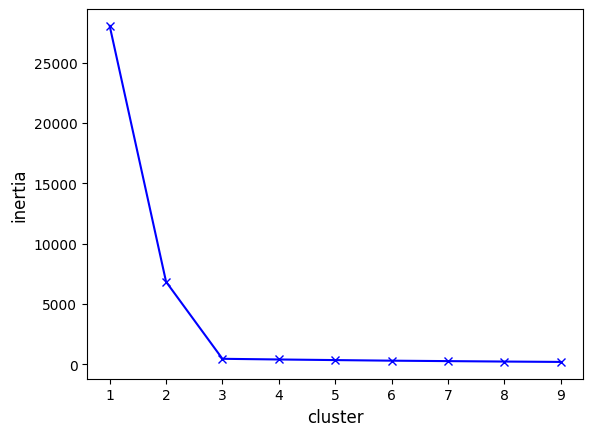

In [8]:
X = df[['Defense', 'Attack']]

# функция, которая принимает количество кластеров для k-means и матрицу с признаками объектов и возвращает инерцию 
def get_inertia(cluster_num, X):
# инициализируем алгоритм кластеризации
    k_means =  KMeans(n_clusters=cluster_num, random_state=42)
# запускаем алгоритм k-means
    k_means.fit(X)
# находим значение инерции
    inertia = k_means.inertia_
# возвращаем значение инерции
    return inertia

# создаём пустой список для значений инерции
inertia = []
# итерируемся по разным размерам кластеров (от 1 до 9) и сохраняем значение инерции для каждого кластера
for cluster_num in range(1, 10):
# сохраняем значения
    inertia.append(get_inertia(cluster_num, X))

# визуализируем, как менялась инерция в зависимости от количества кластеров
# задаём названия осям x и y
plt.xlabel("cluster", fontsize=12)
plt.ylabel("inertia", fontsize=12)
# рисуем изменение инерции
plt.plot([i for i in range(1, 10)], inertia, 'xb-')

Как можно заметить из графика, на сгибе k=3. Значит, оптимальное количество кластеров, подобранное с помощью алгоритма локтя, равняется трём. Значения k от 1 до 2 — недообученная область, а после значения 3 идёт переобучение.

***Коэфицент силуэта***

Некорректное описание было, но примерно это следующее. Среднее значение по всем точкам  (среднего расстояния до элементов своего кластера минус среднее расстояние до объектов другого ближайшего кластера) разделить на максимум этих расстояний (для нормализации)

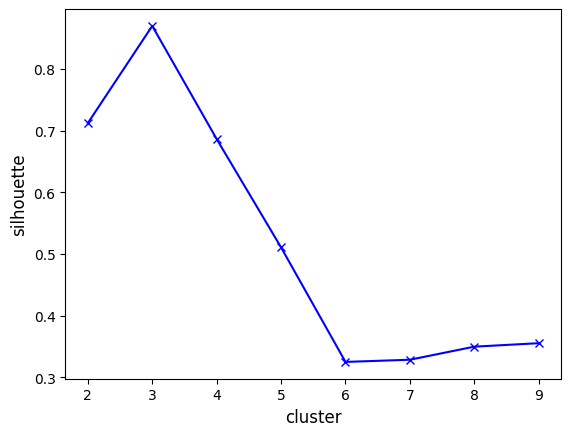

In [9]:
# импортируем метрику силуэта
from sklearn.metrics import silhouette_score

# напишем функцию, как и при подсчёте метода локтя
def get_silhouette(cluster_num, X):
    k_means =  KMeans(n_clusters=cluster_num, random_state=42)
    k_means.fit(X)
# подсчитаем метрику силуэта, передав данные и то, к каким кластерам относятся объекты
    silhouette = silhouette_score(X, k_means.labels_)
    return silhouette

silhouette = []
for clust_num in range(2, 10):
    silhouette.append(get_silhouette(clust_num, X))

# визуализируем коэффициенты силуэта для разного количества кластеров
plt.xlabel("cluster", fontsize=12)
plt.ylabel("silhouette", fontsize=12)
plt.plot([i for i in range(2, 10)], silhouette, 'xb-')

Получается что лучший результат там где кластеры макстмально сгруппированы (грубо)

In [10]:
#Задание 2.7
#Вам как специалисту по анализу данных поступили показания с прибора, измеряющего количество нитратов и пестицидов в разных фруктах и овощах.

#Значения количества пестицидов и нитратов записаны в столбцы с названиями x1 и x2.

#Основываясь на этих двух свойствах, кластеризуйте данные и, используя коэффициент силуэта, найдите оптимальное количество кластеров.

In [11]:
task_df = pd.read_csv('values_from_the_instrument.csv')
task_df.head()

,x1,x2
0,48.848600,67.882051
1,60.343304,74.215686
2,48.155670,68.313920
3,48.546786,68.090451
4,47.124609,67.132278


<AxesSubplot: xlabel='x1', ylabel='x2'>

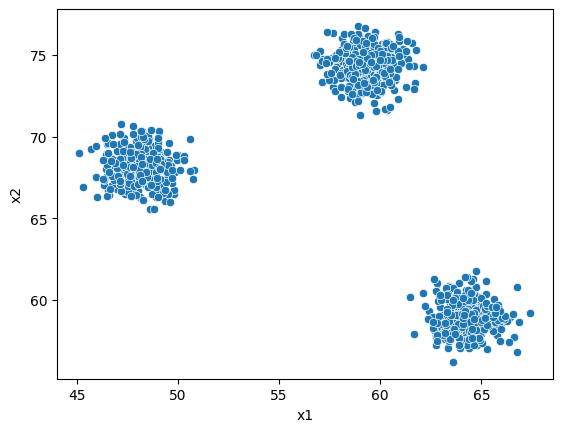

In [12]:
sns.scatterplot(x=task_df['x1'],y=task_df['x2'])

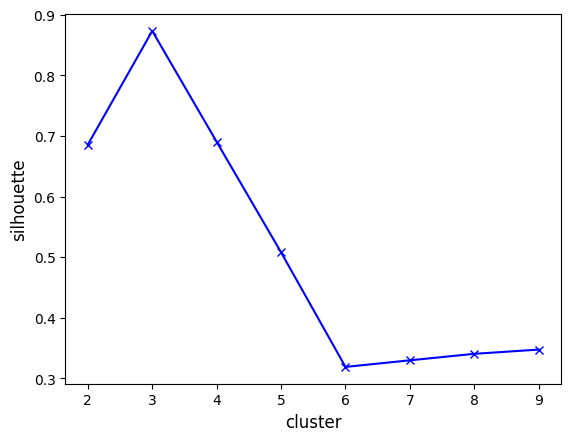

In [13]:
silhouette = []
for clust_num in range(2, 10):
    silhouette.append(get_silhouette(clust_num, task_df))

# визуализируем коэффициенты силуэта для разного количества кластеров
plt.xlabel("cluster", fontsize=12)
plt.ylabel("silhouette", fontsize=12)
plt.plot([i for i in range(2, 10)], silhouette, 'xb-')

### Метрики кластеризации

Допустим, мы разделили кошек и собак на два кластера: в каждом из кластеров находятся либо только кошки, либо только собаки. Но может получиться так, что в ходе кластеризации мы разделим одинаковых собак по разным кластерам или кошки с собаками перемешаются

Поэтому было бы хорошо как-то оценивать, не создали ли мы лишние кластеры или одинаковые ли объекты в нашем кластере. В этом нам помогут метрики, которые мы рассмотрим далее.

Чтобы понять, правильно ли объекты распределились по кластерам, необходимо знать, в каких кластерах должны быть объекты.

Ранее мы говорили, что кластеризация относится к методу машинного обучения без учителя и применяется, когда нет размеченных данных, а значит мы не знаем правильных ответов. Однако иногда размеченные данные всё же есть. В таком случае мы можем провести дополнительный анализ получившихся кластеров.

Существует ряд метрик, которые можно подсчитать, **если данные размечены**. Мы рассмотрим четыре метрики, которые больше всего помогут нам при анализе результатов кластеризации:

**ОДНОРОДНОСТЬ КЛАСТЕРОВ (HOMOGENEITY SCORE)**

Кластер считается однородным, если в нём содержатся объекты, принадлежащие только к одному кластеру.

Значение метрики уменьшается, если объединить два разных кластера, которые содержат непохожие объекты.
Метрика меняется от 0 (перемешано все) до 1 (полностью однородно - в каждогм кластере только свои объекты)

In [14]:
# импортируем подсчёт метрики однородности кластеров
from sklearn.metrics.cluster import homogeneity_score

# передаём предсказанную информацию (к какому кластеру относятся объекты датасета) и правильные ответы
print(homogeneity_score(labels_true=[0, 0, 1, 1], labels_pred=[0, 0, 1, 1]))

1.0


In [15]:
print(homogeneity_score(labels_true=[1, 1, 0, 0], labels_pred=[0, 0, 1, 1]))

1.0


In [16]:
print(homogeneity_score(labels_true=[0, 1, 1, 0], labels_pred=[0, 0, 1, 1]))

0.0


Рассмотрим метрику однородности на примере результатов кластеризации покемонов. Возьмём два случая — с тремя и четырьмя кластерами:

In [17]:
print(homogeneity_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k3))
print(homogeneity_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k4))

1.0
1.0


Вы можете удивиться, что во втором случае метрика равна 1, но это нормально: хоть мы и разделили данные на большее количество кластеров, внутри кластеров данные остались однородными. Т.е. в кластер 3 правильный попали только элементы кластер 3 и 4 расчетных

**ПОЛНОТА КЛАСТЕРА (COMPLETENESS SCORE)**

Значение данной метрики показывает, насколько кластер заполнен объектами, которые в действительности должны принадлежать к этому кластеру.

Результат кластеризации удовлетворяет требованиям полноты, если все элементы данных, принадлежащие к одному классу, при кластеризации оказались в одном кластере.

Значение метрики уменьшается, если эталонный кластер разделить на части. Например, если кластер, в котором находятся только собаки, разделить на два более мелких кластера, то метрика полноты у такой кластеризации будет меньше

При максимальном заполнении кластеров схожими объектами полнота равняется 1 (когда есть один большой кластер со всеми собаками), при минимальном заполнении — 0.

In [18]:
# импортируем метрику полноты
from sklearn.metrics.cluster import completeness_score

# передаём предсказанную информацию (к какому кластеру относятся объекты датасета) и правильные ответы, подсчитываем метрику
completeness_score(labels_true=[0, 0, 1, 1], labels_pred=[0, 0, 1, 1])

1.0

In [19]:
completeness_score(labels_true=[1, 1, 1, 1], labels_pred=[0, 0, 1, 1])

0.0

Рассмотрим метрику полноты на примере результатов кластеризации покемонов. Возьмём два случая — с тремя и четырьмя кластерами:

In [20]:
# посчитаем, насколько полными получились кластеры с покемонами
print(completeness_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k3))
# посчитаем, насколько полными получились кластеры с покемонами
print(completeness_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k4))

1.0
0.829867483307009


Так получилось потому что кластер 3 эталонный не полон

**V-МЕРА (V-MEASURE)**

Эта метрика — комбинация метрик полноты и однородности.

Значение V-меры варьируется от 0 до 1. Метрика будет равна 1 только в том случае, если кластеры будут однородными и полными одновременно.

$v = \frac{(1 + \beta) \times homogeneity \times completeness}{(\beta \times homogeneity + completeness)}$

По умолчанию $\beta$ = 1, но это значение можно варьировать, если хочется дать разный вес разным свойствам.

Если однородность кластеров важнее, чем их полнота, следует указать значение < 1

Если однородность кластеров не особо важна, но важно, чтобы каждый кластер содержал максимальное количество похожих объектов тогда >1

Метрику однородности кластера при кластеризации можно сравнить с метрикой precision из задачи классификации: метрика однородности также показывает, насколько точно мы предсказали, к какому классу принадлежит объект. Метрика полноты так же, как метрика recall из задачи классификации, показывает, насколько мы наполнили кластеры теми объектами, которые должны принадлежать к данным кластерам.

In [21]:
from sklearn.metrics import v_measure_score

# посчитаем V-меру для кластеров с покемонами
print(v_measure_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k3))

print(v_measure_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k4))

1.0
0.9070246789753754


**ИНДЕКС РЭНДА**

Данный индекс сравнивает предсказанный датасет и размеченные данные и подсчитывает, сколько образовалось пар объектов, которые оказались в одном кластере (number of agreeing pairs), среди предсказанных и размеченных данных.

$Rand \ Index = \frac{number \ of \ agreeing \ pairs}{number \ of \ pairs}$

По сути, данная метрика подсчитывает, для какой доли объектов датасета мы правильно определили кластер.

In [22]:
# импортируем из библиотеки sklearn подсчёт индекса Рэнда
from sklearn.metrics.cluster import rand_score
# передаём в rand_score размеченные и предсказанные данные
rand_score([0, 0, 1, 1], [0, 0, 1, 1])

1.0

In [23]:
rand_score([1, 1, 0, 0], [0, 0, 1, 1])

1.0

In [24]:
rand_score([0, 1, 1, 1], [0, 1, 1, 0])

0.5

In [25]:
#Задание 3.3
#Для пяти объектов вы провели кластеризацию k-means. 
# Известно, что объекты должны относиться к следующим кластерам: 1, 2, 2, 1, 0. 
# В ходе работы алгоритма вы получили следующие предсказания для каждого элемента: 1, 0, 2, 1, 2.

#Рассчитайте метрику однородности полученных кластеров. Введите полученное значение, округлив его до второго знака после точки-разделителя.

print(homogeneity_score(labels_true=[1, 2, 2, 1, 0], labels_pred=[1, 0, 2, 1, 2]))

0.737175493807016


### ИЕРАРХИЧЕСКАЯ КЛАСТЕРИЗАЦИЯ

In [26]:
from sklearn.cluster import AgglomerativeClustering
a_c = AgglomerativeClustering(n_clusters=2)
a_c.fit(X)
a_c.labels_

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1], dtype=int64)

Базовые параметры, которые необходимо передать в AgglomerativeClustering:

* n_clusters — количество кластеров; по умолчанию — 2.
* linkage — метод определения расстояния между кластерами, которое мы рассматривали выше. Можно выбрать single, ward, average, complete; по умолчанию используется ward.
    * single - расстояние между кластерами считаем, как минимум расстояний между их элементами
    * complete - расстояние между кластерами считаем, как макстмум расстояний между их элементами
    * ward - минимизируем разброс внустри кластеров
    * average - расстояние между кластерами как среднее расстоняие между кластерами 

**ПРЕИМУЩЕСТВА И НЕДОСТАТКИ ИЕРАРХИЧЕСКОЙ КЛАСТЕРИЗАЦИИ**

***Плюсы***

* Можно построить дендрограмму и понять, как устроены данные.
* Работает на небольшом датасете.

***Минусы***

* Необходимость выбора оптимального количества кластеров.
* Если данных много, дендрограмма становится большой и сложной для понимания.
* Может неравномерно разделять данные на кластеры.

### EM-алгоритмы кластеризации

В основе данного подхода лежит предположение, что любой объект принадлежит ко всем кластерам, но с разной вероятностью.

Один из примеров EM (Expectation-maximization)-алгоритма — это k-means-кластеризация, рассмотренная нами ранее.

Алгоритм состоит из двух шагов. Если рассмотреть их на примере k-means, то:

на шаге E мы вычисляем, к какому кластеру будет относиться объект на основании расстояний до центроида;
на шаге M мы пересчитываем центроиды кластеров.
Когда данные распределены в форме вытянутых эллипсов (см. график ниже), алгоритм k-means не справляется с кластеризацией. В качестве альтернативы можно взять ещё один из алгоритмов EM-кластеризации — модель гауссовой смеси (Gaussian Mixture Model, GMM), в котором данные описываются функцией Гаусса. Это значит, что мы можем выделить два параметра для описания кластеров: среднее значение и стандартное отклонение. Если рассмотреть двухмерный случай, то кластеры могут принимать любую эллиптическую форму, так как есть стандартное отклонение в обоих направлениях (по x и по y).



На шаге E данного алгоритма мы будем определять вероятность того, что объект принадлежит к кластеру, а на шаге M будем пересчитывать параметры функции Гаусса, чтобы подобрать наиболее подходящие кластеры для наших данных.

### модель гауссовой смеси (Gaussian Mixture Model, GMM)

In [27]:
from sklearn.mixture import GaussianMixture

In [28]:
gm_clustering = GaussianMixture(n_components=3, random_state=42)

# обучаем модель 
gm_clustering.fit(X)

# для матрицы X получаем предсказания, к какому кластеру принадлежат объекты
gm_prediction = gm_clustering.predict(X)

Основные параметры, которые необходимо задать для запуска алгоритма GaussianMixture:

* n_components — количество кластеров.
* random_state — так как в алгоритме есть случайность при инициализации, то для воспроизводимости результатов от запуска к запуску следует передать какое-то число.

<AxesSubplot: xlabel='Attack', ylabel='Defense'>

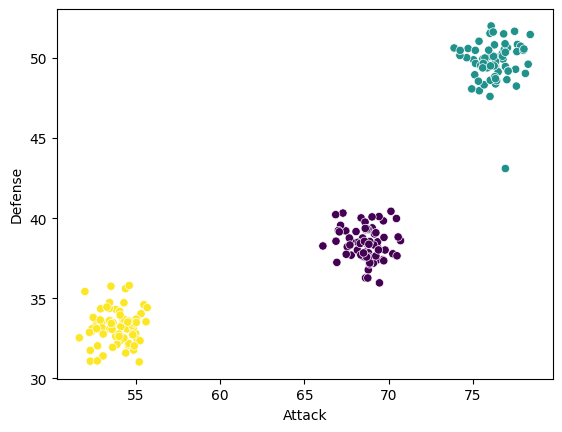

In [29]:
sns.scatterplot(x=df.Attack, y=df.Defense, c=gm_prediction)

<AxesSubplot: xlabel='Attack', ylabel='Defense'>

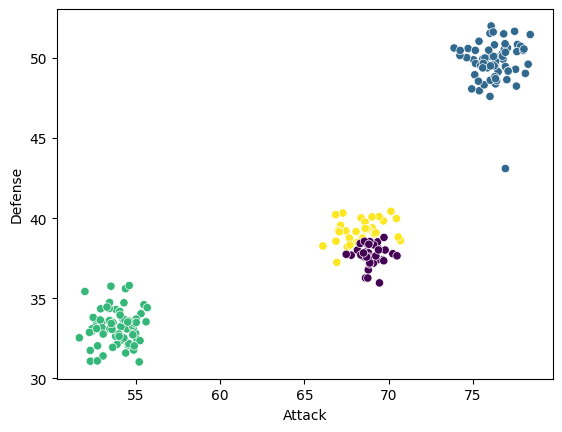

In [30]:
gm_clustering = GaussianMixture(n_components=4, random_state=42)

# обучаем модель 
gm_clustering.fit(X)

# для матрицы X получаем предсказания, к какому кластеру принадлежат объекты
gm_prediction = gm_clustering.predict(X)
sns.scatterplot(x=df.Attack, y=df.Defense, c=gm_prediction)

<AxesSubplot: xlabel='Speed', ylabel='Defense'>

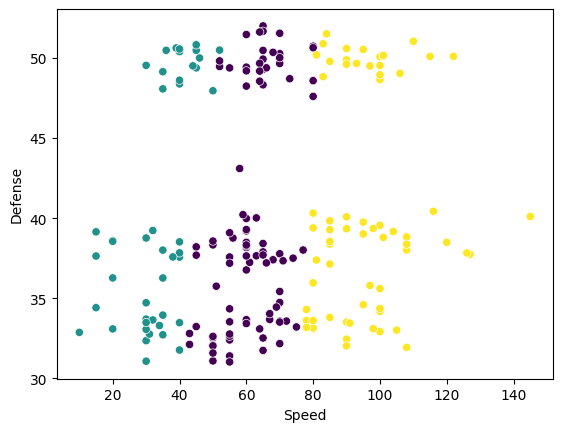

In [31]:
X = df[['Defense', 'Speed']]



gm_clustering = GaussianMixture(n_components=3, random_state=42)

# обучаем модель 
gm_clustering.fit(X)

# для матрицы X получаем предсказания, к какому кластеру принадлежат объекты
gm_prediction = gm_clustering.predict(X)
sns.scatterplot(x=df.Speed, y=df.Defense, c=gm_prediction)


In [32]:
#Задание 5.4
#Скачайте датасет, в котором представлены цены на однокомнатные квартиры и возраст этих квартир. 
#Проведите кластеризацию GMM, используя два признака: цену и возраст квартир. Какое оптимальное количество кластеров получилось?

In [33]:
task_df = pd.read_csv('housing.csv')
task_df.head()

,year,price
0,0.081091,23.790515
1,9.483270,10.784598
2,9.901805,10.003782
3,1.930438,21.879849
4,1.618601,21.851806


<AxesSubplot: xlabel='price', ylabel='year'>

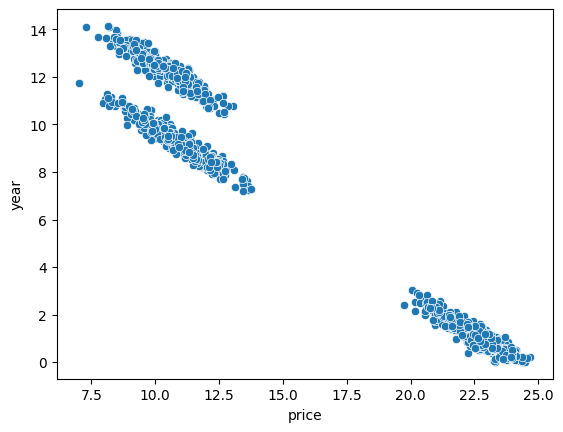

In [34]:
sns.scatterplot(x=task_df.price, y=task_df.year)

<AxesSubplot: xlabel='price', ylabel='year'>

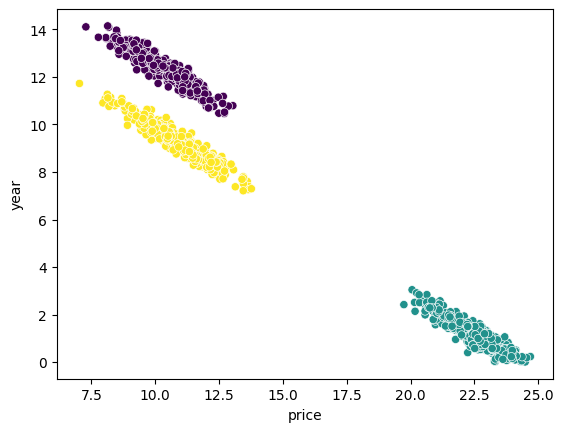

In [35]:
gm_clustering = GaussianMixture(n_components=3, random_state=42)

# обучаем модель 
gm_clustering.fit(task_df)

# для матрицы X получаем предсказания, к какому кластеру принадлежат объекты
gm_prediction = gm_clustering.predict(task_df)
sns.scatterplot(x=task_df.price, y=task_df.year, c=gm_prediction)


<AxesSubplot: xlabel='price', ylabel='year'>

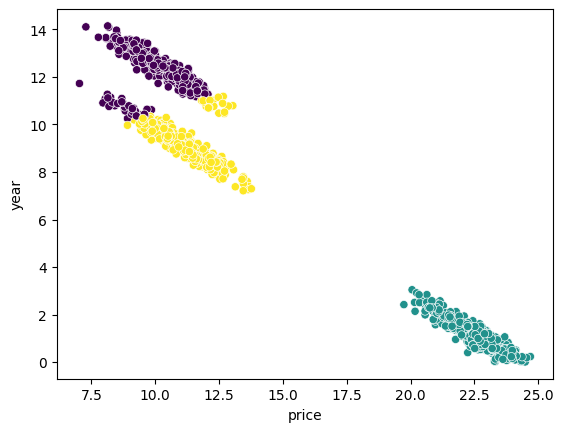

In [36]:
k_mean_clustering = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=42)

# обучаем модель 
k_mean_clustering.fit(task_df)

# для матрицы X получаем предсказания, к какому кластеру принадлежат объекты
k_mean_prediction = k_mean_clustering.predict(task_df)
sns.scatterplot(x=task_df.price, y=task_df.year, c=k_mean_prediction)

### Спектральная кластеризация

Данный тип кластеризации использует собственные значения (спектр) матрицы сходства данных, чтобы снизить размерность данных и далее провести кластеризацию.

Алгоритм спектральной кластеризации состоит из четырёх шагов:

1. На первом шаге мы создаём граф, количество вершин которого равняется количеству объектов в датасете. Рёбра графа, соединяющие две вершины, будут содержать информацию о схожести двух объектов, находящихся в вершине. Информацию о схожести вершин записываем в матрицу, строки и столбцы которой — это вершины, а в ячейку записана схожесть двух вершин

2. После этого проводим некоторые математические преобразования этой матрицы. (Это как-то связано как раз со спектром и вероятно сингулярными числами)

3. Далее уменьшаем размерность данных. Сейчас одна вершина описывается шестью признаками, а значит, если проводить кластеризацию этих данных, кластеризация будет в шестимерном пространстве. С помощью подходов понижения размерности мы можем уменьшить количество признаков, описывающих вершину. На данный момент вникать в суть преобразований нам не нужно (в одном из следующих юнитов этого модуля мы разберём эту задачу более подробно) — сейчас важно понять саму идею преобразования, а также то, что до понижения размерности мы описывали одну вершину графа шестью признаками, а после преобразования стали описывать её одним признаком

4. Далее проводим кластеризацию матрицы с уменьшенной размерностью.


In [37]:
# вызываем из sklearn SpectralClustering 
from sklearn.cluster import SpectralClustering


# запускаем кластеризацию, задав количество кластеров, равное 3 
spectral_clustering = SpectralClustering(n_clusters=3, random_state=42)

spectral_clustering.fit(df[['Attack', 'Defense']])
# получаем результаты кластеризации
spectral_predictions = spectral_clustering.labels_

Основные параметры SpectralClustering:

n_clusters — количество кластеров; по умолчанию — 8.
random_state — так как в алгоритме есть случайность при инициализации, то для воспроизводимости результатов от запуска к запуску необходимо передать какое-то число.

<AxesSubplot: xlabel='Attack', ylabel='Defense'>

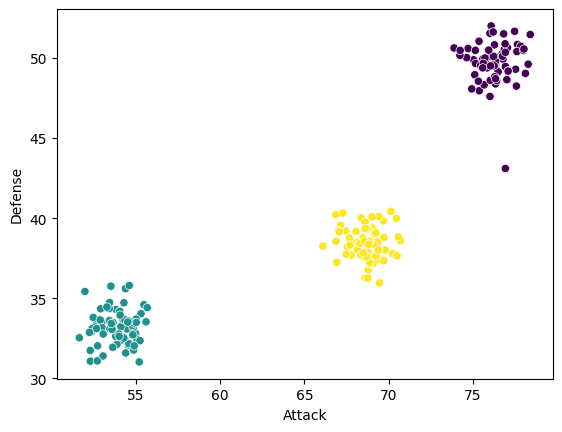

In [38]:
sns.scatterplot(x=df.Attack, y=df.Defense, c=spectral_predictions)

<AxesSubplot: xlabel='Attack', ylabel='Defense'>

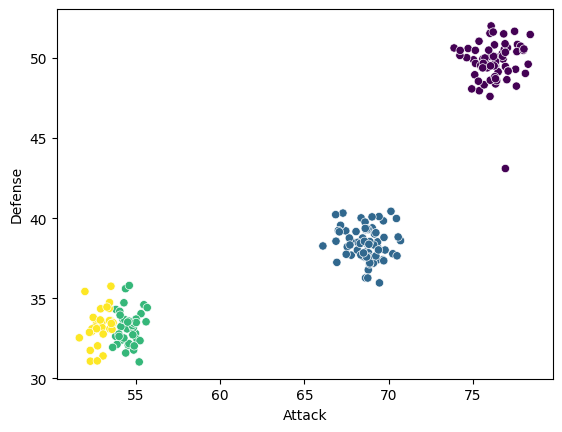

In [39]:
# вызываем из sklearn SpectralClustering 
from sklearn.cluster import SpectralClustering


# запускаем кластеризацию, задав количество кластеров, равное 3 
spectral_clustering = SpectralClustering(n_clusters=4, random_state=42)

spectral_clustering.fit(df[['Attack', 'Defense']])
# получаем результаты кластеризации
spectral_predictions = spectral_clustering.labels_

sns.scatterplot(x=df.Attack, y=df.Defense, c=spectral_predictions)

**ПРЕИМУЩЕСТВА И НЕДОСТАТКИ СПЕКТРАЛЬНОЙ КЛАСТЕРИЗАЦИИ**

***Плюсы***

* Подходит для кластеризации данных с большим количеством признаков, так как использует технику понижения размерности.
* Эффективна для кластеризации разрежённых данных.
* Хорошо работает на практически любых распределениях данных. КРоме вытянутых эллипсов

***Минусы***

* Нужно заранее задавать количество кластеров.
* Подходит для задач сбалансированной классификации, то есть количество точек между кластерами не сильно отличается.

### Кластеризация на основе плотности

Такая кластеризация находит в датасете области с высокой плотностью и на их основе образует кластеры. Редкие объекты, которые находятся в отдалении от других данных и для которых нужен отдельный кластер, считаются шумом.

При кластеризации на основе плотности нам не нужно задавать количество кластеров — алгоритм сам определяет оптимальное число. Такой алгоритм кластеризации отлично справляется с выбросами и с данными произвольной формы.

**DBSCAN (DENSITY-BASED SPATIAL CLUSTERING OF APPLICATIONS WITH NOISE)**

Данный алгоритм применим, если:

* перед вами стоит задача с данными сложной формы, например выделение районов на карте
* в данных большое количество выбросов, например данные медицинских анализов пациентов.

Алгоритм работы:

1. Сначала необходимо выбрать случайный объект в данных (на рисунке выбранная точка выделена красным) и в некотором радиусе  от этой точки найти всех соседей. Радиус данной окружности задаётся и может регулироваться пользователем. Далее подсчитаем, сколько точек перекрывает окружность. Далее будем выбирать точки в данных и таким же образом находить соседей этих точек.
2. Выделим центральные точки (core points). Центральными будут считаться точки, вокруг которых находится три или более объектов. Данное значение обычно задаётся пользователем. Находим центральные точки во всём датасете. Это будет выглядеть так
3. Среди центральных точек выберем случайным образом одну и примем, что эта точка относится к первому кластеру. Далее найдём все центральные точки, находящиеся в заданном радиусе от этой точки. Если же в заданном радиусе окажутся не только центральная, но и нецентральная точки, то на данном этапе такая точка не будет добавлена в кластер
4. После того как центральные точки в первом кластере заканчиваются, мы начинаем находить нецентральные точки, которые располагаются в радиусе  от объектов
5. Далее переходим к неразмеченной области в данных Заново повторяем алгоритм, начиная с пункта 3, и в итоге получаем второй кластер и т.д. пока все центарльные точки не получат кластер
6. Точки, которые не имеют соседей в заданном радиусе, считаются выбросами и не принадлежат ни к одному кластеру.

<AxesSubplot: xlabel='Attack', ylabel='Defense'>

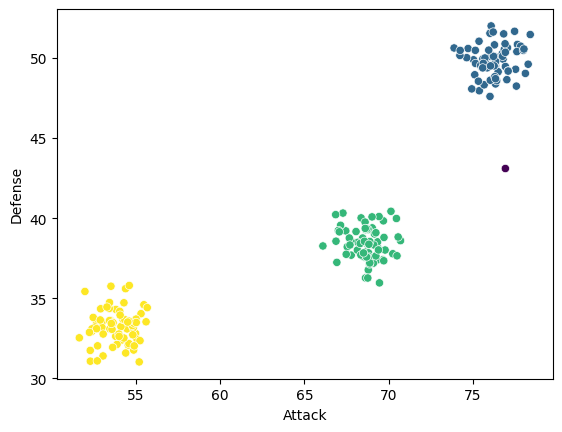

In [40]:
# импортируем DBSCAN-кластеризацию
from sklearn.cluster import DBSCAN

#запускаем кластеризацию на наших данных
clustering = DBSCAN(eps=3, min_samples=3).fit(df[['Attack', 'Defense']])

# Далее можно визуализировать результаты, как мы делали это с алгоритмом k-means
sns.scatterplot(x=df.Attack, y=df.Defense, c=clustering.labels_)

Основные параметры для запуска DBSCAN:

* eps — это радиус, про который мы говорили выше, когда рассматривали алгоритм. Это один из важнейших параметров в алгоритме DBSCAN. Попробуйте изменять его и посмотрите, как будут меняться кластеры в зависимости от значения параметра. Если данные разрежённые, значение радиуса должно быть больше. Если же данные расположены довольно близко друг к другу, значение радиуса можно уменьшить.
* min_samples — задаёт необходимое количество точек, которое должно быть в заданном радиусе от точки, чтобы она считалась центральной.

<AxesSubplot: xlabel='Attack', ylabel='Defense'>

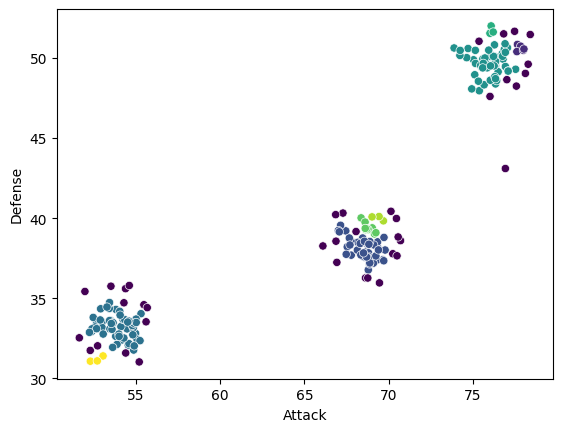

In [41]:
# импортируем DBSCAN-кластеризацию
from sklearn.cluster import DBSCAN

#запускаем кластеризацию на наших данных
clustering = DBSCAN(eps=0.5, min_samples=3).fit(df[['Attack', 'Defense']])

# Далее можно визуализировать результаты, как мы делали это с алгоритмом k-means
sns.scatterplot(x=df.Attack, y=df.Defense, c=clustering.labels_)

**ПРЕИМУЩЕСТВА И НЕДОСТАТКИ DBSCAN**

***Плюсы***
* Не нужно задавать количество кластеров.
* Устойчив к шуму и выбросам, может находить выбросы в данных.
* Способен найти кластеры любой геометрической формы.

***Минусы***
* Не может качественно кластеризовать наборы данных с большой разницей в плотности.
* Равноудалённые от двух кластеров объекты могут быть отнесены к тому кластеру, с которого алгоритм начал работать, что не всегда оказывается верным.
* Бывает сложно подобрать eps.

In [42]:
#Задание 7.5
#Для датасета с ценами квартир проведите кластеризацию DBSCAN с параметрами по умолчанию. 
# Визуализируйте результаты. Сколько точек было размечено как выбросы?

In [43]:
task_df = pd.read_csv('housing.csv')

task_df.head(2)

,year,price
0,0.081091,23.790515
1,9.483270,10.784598


<AxesSubplot: xlabel='year', ylabel='price'>

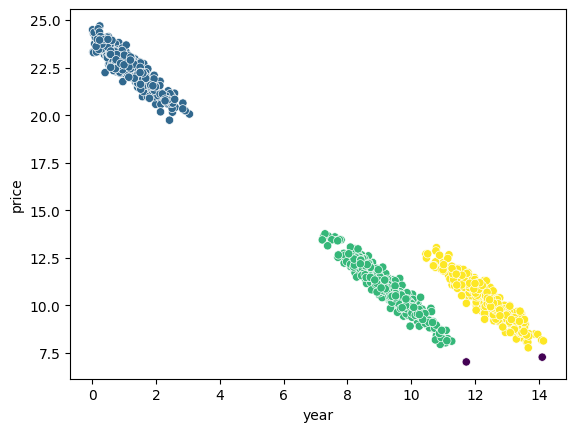

In [44]:
clustering = DBSCAN().fit(task_df)
sns.scatterplot(x=task_df['year'], y=task_df['price'], c=clustering.labels_)

<AxesSubplot: xlabel='year', ylabel='price'>

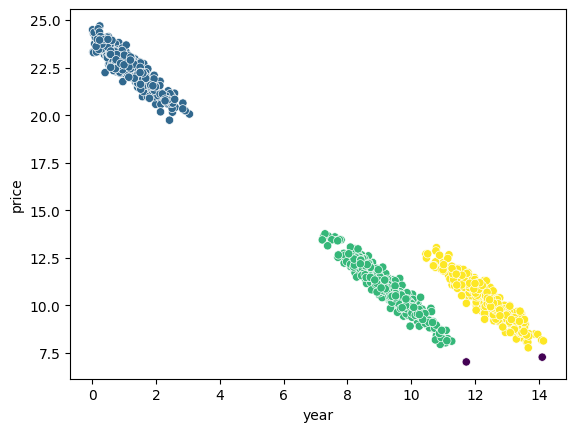

In [45]:
clustering = DBSCAN(eps=0.5, min_samples=5).fit(task_df)
sns.scatterplot(x=task_df['year'], y=task_df['price'], c=clustering.labels_)


<AxesSubplot: xlabel='year', ylabel='price'>

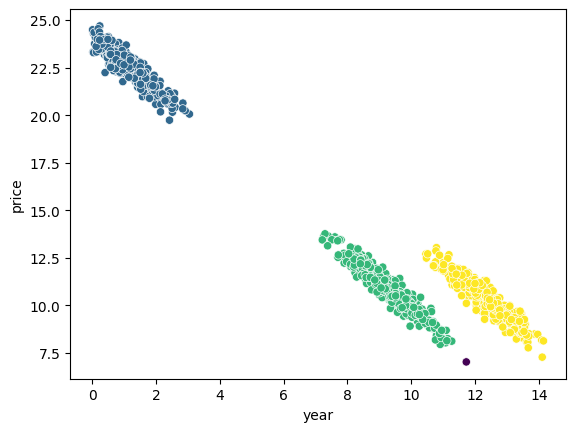

In [46]:
clustering = DBSCAN(eps=0.7, min_samples=6).fit(task_df)
sns.scatterplot(x=task_df['year'], y=task_df['price'], c=clustering.labels_)

<AxesSubplot: xlabel='year', ylabel='price'>

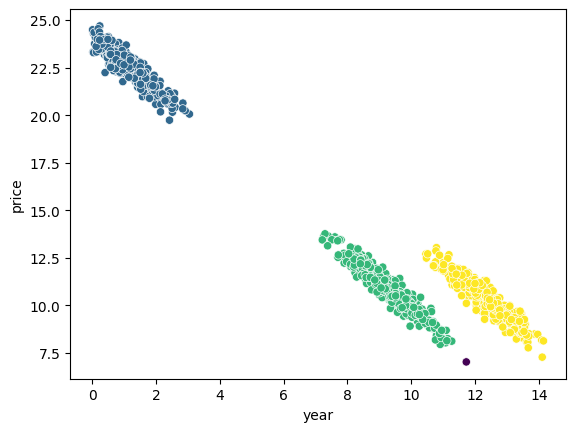

In [47]:
clustering = DBSCAN(eps=0.7, min_samples=5).fit(task_df)
sns.scatterplot(x=task_df['year'], y=task_df['price'], c=clustering.labels_)

<AxesSubplot: xlabel='year', ylabel='price'>

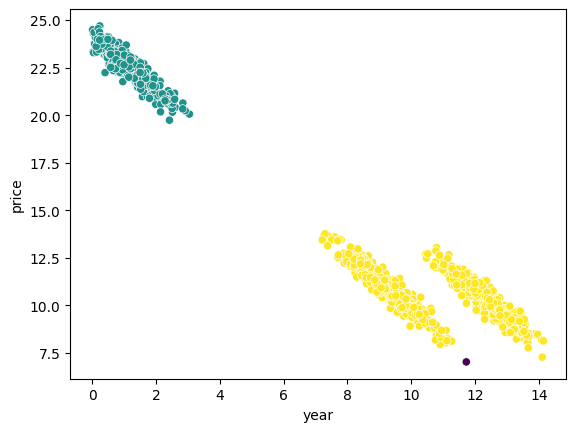

In [48]:
clustering = DBSCAN(eps=1.15, min_samples=2).fit(task_df)
sns.scatterplot(x=task_df['year'], y=task_df['price'], c=clustering.labels_)

### Визуализация результатов кластеризации

In [49]:
df = pd.read_csv("airbnb.csv")
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


В данном датасете довольно много данных, например имя арендодателя, минимальное время аренды. Нас интересуют только широта (столбец latitude) и долгота (столбец longitude), а также цена (столбец price) аренды квартиры. Визуализируем данные, основываясь на широте и долготе:

<AxesSubplot: xlabel='latitude', ylabel='longitude'>

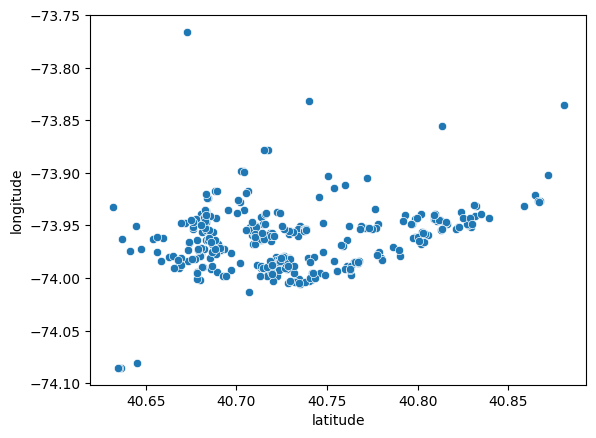

In [50]:
sns.scatterplot(x=df.latitude, y=df.longitude)

#### **2D-ВИЗУАЛИЗАЦИЯ КЛАСТЕРОВ И ЦЕНТРОИДОВ**

**ДИАГРАММА РАССЕЯНИЯ**

In [51]:
# инициализируем k-means-кластеризацию с шестью кластерами
kmeans_clustering = KMeans(n_clusters=6)

# обучим k-means-модель кластеризации на данных о широте и долготе, сохраним данные о кластерах в predictions
predictions = kmeans_clustering.fit_predict(df[['latitude', 'longitude']])

# сохраним предсказания в колонку clusters датафрейма
df["clusters"] = predictions


# с помощью метода cluster_centers_ найдём координаты центроидов кластеров, сохраним их в список centroids
centroids = kmeans_clustering.cluster_centers_

# для шести кластеров сохраним в отдельные списки значения координат x и y
centroids_x = [i[0] for i in centroids]
centroids_y = [i[1] for i in centroids]

# зададим цвета для разных кластеров
colors = ['#DF2020', '#81DF20', '#2095DF', '#DF20C8', '#20DFC5', '#DF8520']

# создадим пустые словари, чтобы потом соотнести координаты x и у центроидов разных кластеров, а также цвета 
centroids_x_dict = {}
centroids_y_dict = {}
colors_dict = {}

# итерируемся шесть раз, так как у нас шесть кластеров
for i in range(6):
    # сохраняем в словарь номер кластера в качестве ключа, значение координаты x центроида — в качестве значения
    centroids_x_dict[i] = centroids_x[i]
    # сохраняем в словарь номер кластера в качестве ключа, значение координаты y центроида — в качестве значения
    centroids_y_dict[i] = centroids_y[i]
    # сохраняем в словарь номер кластера в качестве ключа, значение цвета — в качестве значения
    colors_dict[i] = colors[i]

Создадим новые столбцы (cen_x, cen_y, color) в датафрейме. В зависимости от значения в ячейке clusters в ячейках cen_x, cen_y и color будут разные значения: если значение в clusters — 0, в cen_x и cen_y будут указаны координаты центроида нулевого кластера и цвет нулевого кластера.

In [52]:
df['cen_x'] = df['clusters'].map(centroids_x_dict) 
df['cen_y'] = df['clusters'].map(centroids_y_dict)
df['color'] = df['clusters'].map(colors_dict)
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,clusters,cen_x,cen_y,color
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,4,40.677937,-73.967837,#20DFC5
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,0,40.735543,-73.988864,#DF2020
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,1,40.812241,-73.943805,#81DF20
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,4,40.677937,-73.967837,#20DFC5
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,1,40.812241,-73.943805,#81DF20


Мы можем просто визуализировать полученные кластеры, передав в переменную информацию о том, какой элемент к какому кластеру принадлежит. В таком случае Seaborn будет автоматически подбирать цвета для кластеров:

<AxesSubplot: xlabel='latitude', ylabel='longitude'>

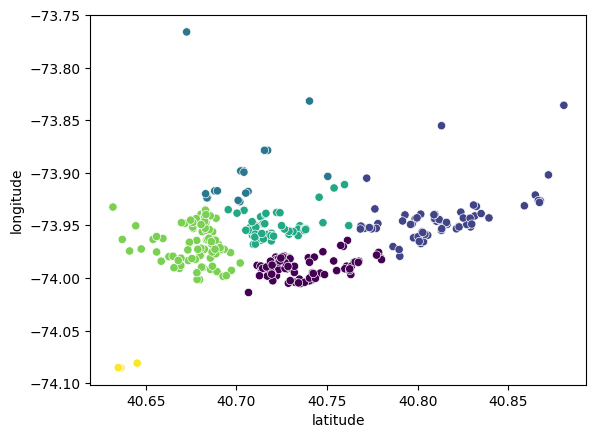

In [53]:
sns.scatterplot(x=df.latitude, y=df.longitude, c=df['clusters'])

Если мы хотим задать определённые цвета для кластеров, в переменную c передадим столбец с заданными цветами:

<AxesSubplot: xlabel='latitude', ylabel='longitude'>

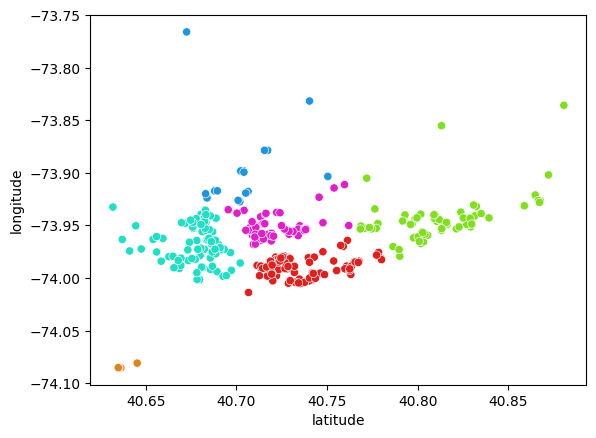

In [54]:
sns.scatterplot(x=df.latitude, y=df.longitude, c=df.color)

Если точек слишком много или мало, может понадобиться уменьшить или увеличить их размер. В этом поможет переменная s.

Также могут встретиться перекрывающиеся кластеры — а таком случае нужно, чтобы цвета объектов в кластере были полупрозрачными. В этом поможет переменная alpha: чем ближе её значение к 1, тем менее прозрачны объекты на графике.

<AxesSubplot: xlabel='latitude', ylabel='longitude'>

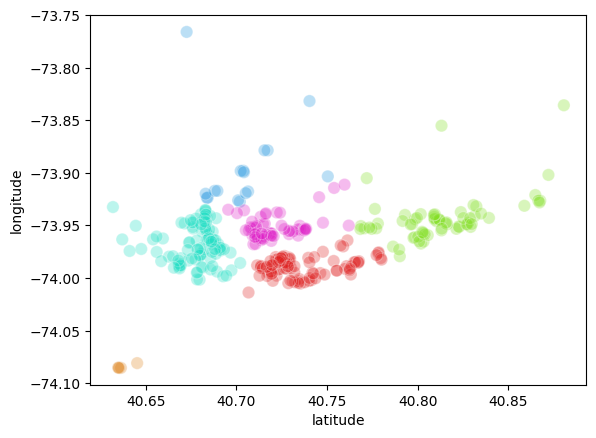

In [55]:
sns.scatterplot(x=df.latitude, y=df.longitude, c=df.color, alpha=0.3, s=80)

<AxesSubplot: xlabel='latitude', ylabel='longitude'>

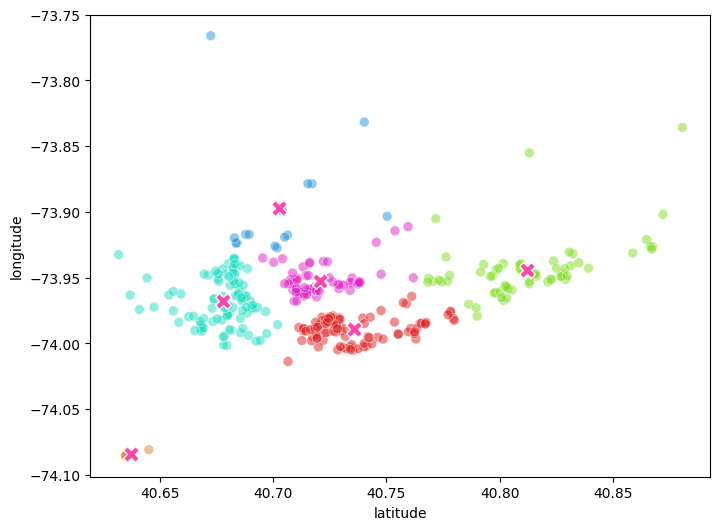

In [56]:
fig, axes = plt.subplots(figsize=(8, 6))
# визуализируем элементы датасета
# параметр c отвечает за цвет элемента в зависимости от того, к какому кластеру он принадлежит
# s отвечает за размер объектов на графике, alpha отвечает за прозрачность точек
sns.scatterplot(x=df.latitude, y=df.longitude, c=df.color, s=50, alpha=0.5)
# визуализируем центроиды: отметим их на графике крестиком (marker="X") и зададим им розовый цвет 
sns.scatterplot(x=centroids_x, y=centroids_y, marker="X", c=['#FC46AA'], s=130)

**Выпуклая оболочка (Convex Hull)**

Выпуклая оболочка (Convex Hull) множества точек — это такое выпуклое множество точек, в котором лежат все точки фигуры.

Визуализация Convex Hull помогает понять, насколько получившиеся кластеры крупные и разнообразные. Если все элементы кластера похожи друг на друга, площадь выпуклой оболочки будет маленькой, в противном случае — наоборот. Также на данной диаграмме хорошо заметны выбросы в данных. Выбросы находятся далеко от основных элементов кластера, а значит площадь выпуклой оболочки получается большой.

Для построения выпуклой оболочки каждого кластера воспользуемся библиотекой Scipy и классом ConvexHull.

In [57]:
from scipy.spatial import ConvexHull 
import numpy as np

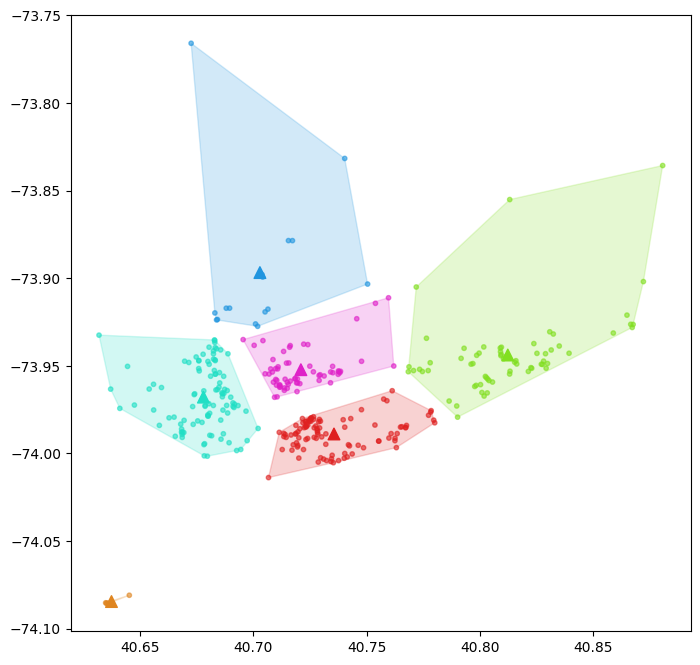

In [58]:
fig, ax = plt.subplots(1, figsize=(8,8))

# визуализируем объекты кластеров и центроиды
plt.scatter(x=df.latitude, y=df.longitude, c=df.color, alpha = 0.6, s=10)
plt.scatter(x=centroids_x, y=centroids_y, marker='^', c=colors, s=70)


# найдём уникальные значения кластеров и проитерируемся по каждому кластеру
for i in df['clusters'].unique():
    # запишем в points значения признаков широты и долготы, принадлежащие к i-му кластеру
    points = df[df.clusters == i][['latitude', 'longitude']].values #просто массив значений координат
 
    hull = ConvexHull(points)
    # hull.vertices - получаем индексы записей, которые являются вершинами данной выпуклой оболочки
    # Запишем координаты оболочки по оси x. Из hull.vertices узнаем индексы элементов, входящих в оболочку.
    # Так как оболочка должна быть замкнутой, то в конце добавляем ещё раз нулевой элемент.
    x_hull = np.append(points[hull.vertices, 0], points[hull.vertices, 0][0]) #добавляем к массиву ч координат вершин в конец снова координату первого элемента этого массива
    y_hull = np.append(points[hull.vertices, 1], points[hull.vertices, 1][0]) 
    
    # рисуем оболочку и заливаем её таким же цветом, как и объекты кластера
    plt.fill(x_hull, y_hull, alpha=0.2, c=colors[i])

В данном случае можно сказать, что среди элементов розового и зелёного кластеров содержатся выбросы, за счёт которых выпуклая оболочка стала большой. Элементы синего кластера наиболее похожи между собой, элементы красного довольно разнообразны относительно других кластеров.

Таким образом, если мы хотим лучше понять, какие данные находятся в кластерах, насколько сильно они схожи между собой или различны, на помощь придёт график Convex Hull.

**ДЕНДРОГРАММА**

Данный способ визуализации необходим, если мы хотим визуализировать результаты иерархической кластеризации.

Из дендрограммы можно вынести много полезной информации. На дендрограмме можно:

* наблюдать, как работал алгоритм: как объединялись (или разбивались) кластеры;
* понять, насколько похожи соседние кластеры между собой;
* предположить, какое количество кластеров можно было бы выбрать для кластеризации.

Для визуализации дендрограммы нам понадобится библиотека Scipy и модули dendrogram и linkage.

linkage — это способ расчёта расстояния между двумя кластерами.

В переменной method можно задать разные способы расчёта расстояния: single, complete, average, weighted, centroid, median, ward.

Функция dendrogram строит дендрограмму, основываясь на информации о расстоянии объектов, полученной из функции linkage. Данная информация позволяет строить на дендрограмме ветви разной высоты.

Наиболее важные переменные, которые принимает функция dendrogram:

* Z — расстояния до объектов кластеров, полученные из функции linkage.
* orientation — ориентация дендрограммы. Данный параметр может принимать значения top, bottom, left, right.
* labels — список с предсказаниями, к какому кластеру какой объект относится.
* distance_sort — определяет, в каком порядке будут визуализированы кластеры: ascending или True означает, что сначала отрисовывается пара кластеров с максимальным расстоянием между ними; descending или False — что сначала отрисовывается пара кластеров с минимальным расстоянием между ними.


Запустим агломеративную кластеризацию на данных об аренде жилья на Airbnb в Нью-Йорке:



In [59]:
# импортируем агломеративную кластеризацию из sklearn
from sklearn.cluster import AgglomerativeClustering

# запускаем агломеративную кластеризацию, расстояние между кластерами рассчитываем методом одиночной связи
agglomerative_clustering = AgglomerativeClustering(n_clusters=6, linkage='single')

# обучаем модель и получаем результаты кластеризации
predictions_ag_model = agglomerative_clustering.fit_predict(df[['latitude', 'longitude']])

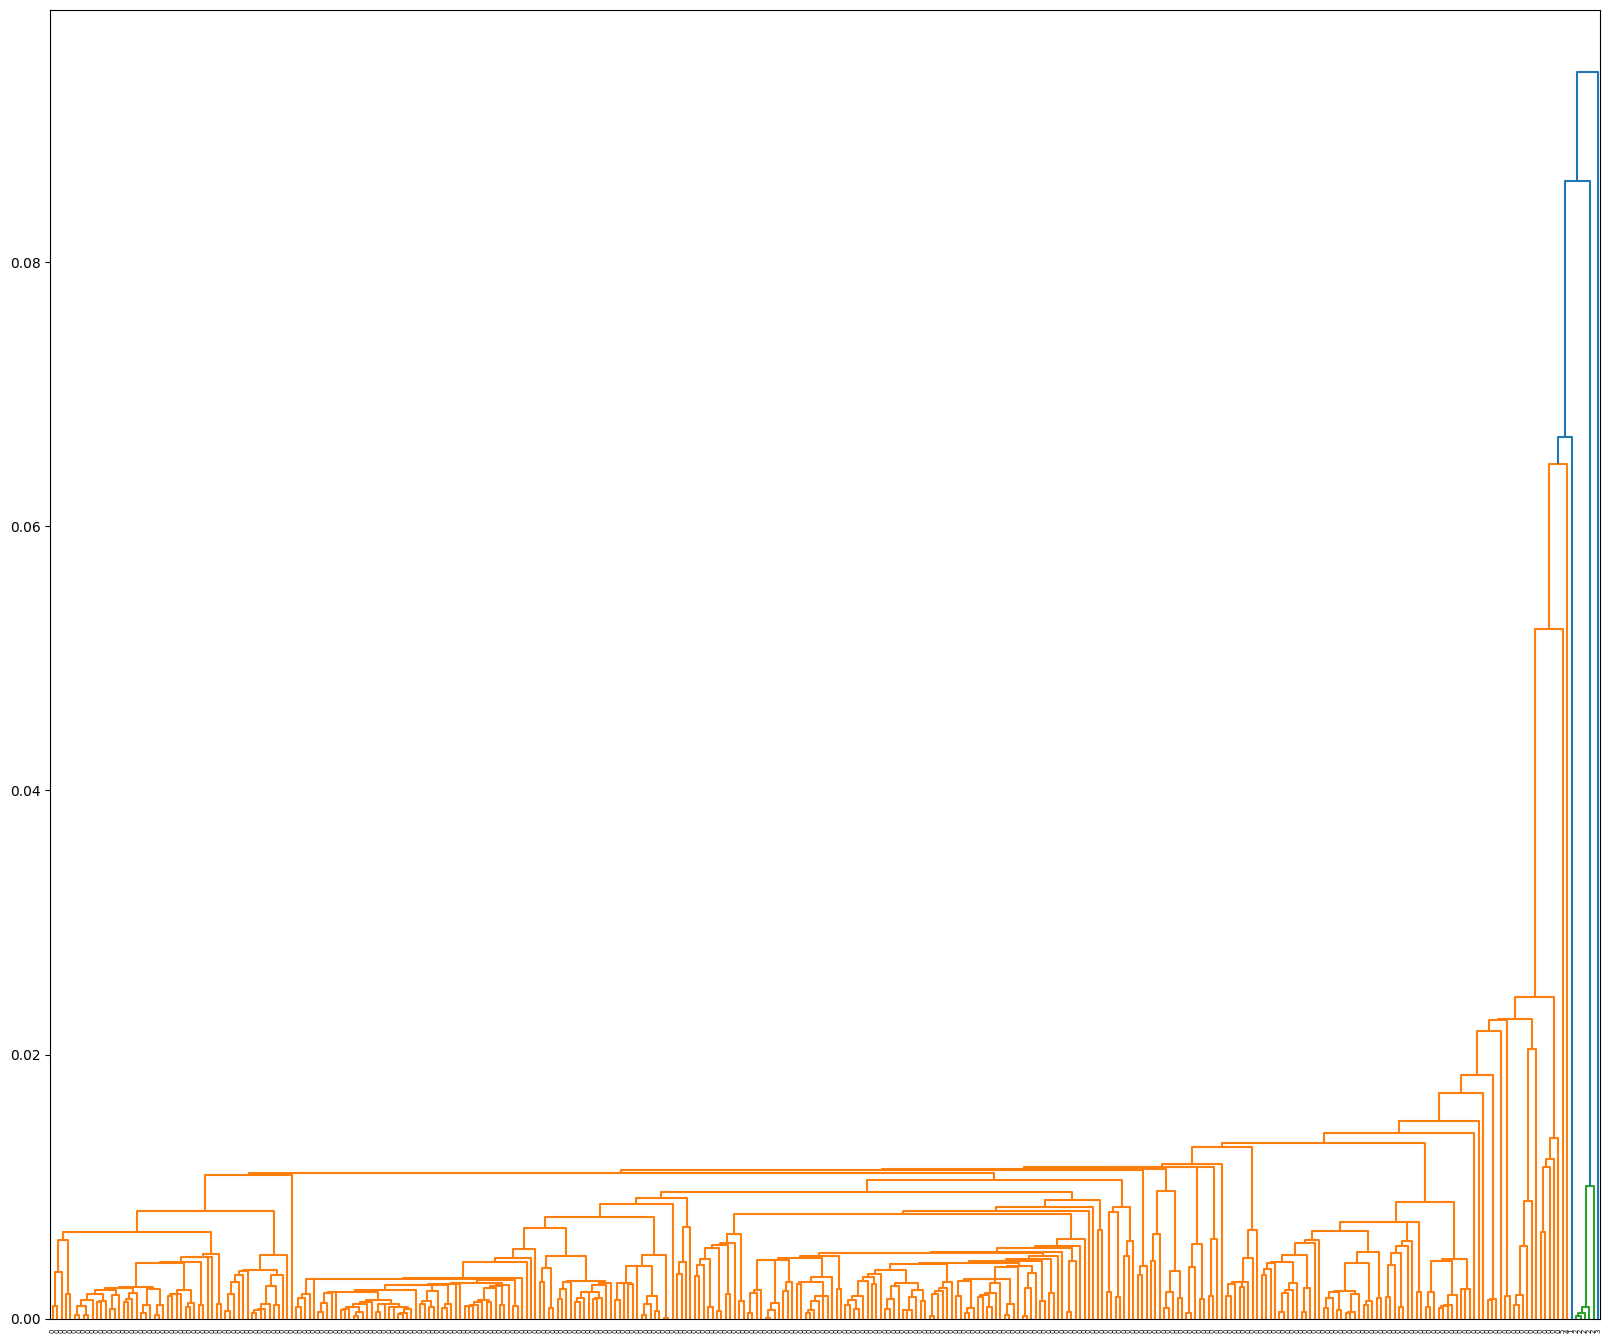

In [60]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

# рассчитаем расстояния между кластерами
linked = linkage(df[["latitude", "longitude"]], 'single')
plt.figure(figsize=(20, 17))

# визуализируем дендрограмму с ориентацией top
# сначала будут отрисовываться кластеры с минимальным расстоянием между ними
dendrogram(Z=linked,
            orientation='top',
            labels=predictions_ag_model,
            distance_sort='descending')

plt.show()

**CLUSTERGRAM**

Данная визуализация позволяет понять, что происходит с данными при разном количестве кластеров, и полезна при исследовательском анализе. Также она может быть полезна и для иерархической кластеризации, когда объектов много и дендрограмма получается сложной для понимания.

Графики Clustergram позволяют отследить, как делятся данные при разном количестве кластеров. Более того, можно оценить, в каком кластере объектов больше, а в каком — меньше.

Изначально все наблюдения образуют единый кластер (исходные данные). После данные делятся на два кластера. При этом можно заметить, что нижняя линия толще — это означает, что во второй кластер попало больше объектов. Далее данные делятся на три кластера, при этом второй снизу кластер образуется путём слияния некоторых элементов из двух предыдущих кластеров.

Построить такой график можно не для всех алгоритмов кластеризации, а только для k-means, GMM и иерархической кластеризации. Метод кластеризации задаётся в поле method, по умолчанию выбрана k-means-кластеризация.

K=1 skipped. Mean computed from data directly.
K=2 fitted in 0.03804636001586914 seconds.
K=3 fitted in 0.0345304012298584 seconds.
K=4 fitted in 0.029641151428222656 seconds.
K=5 fitted in 0.030511140823364258 seconds.
K=6 fitted in 0.03126096725463867 seconds.
K=7 fitted in 0.03253650665283203 seconds.
K=8 fitted in 0.03807210922241211 seconds.


<AxesSubplot: xlabel='Number of clusters (k)', ylabel='PCA weighted mean of the clusters'>

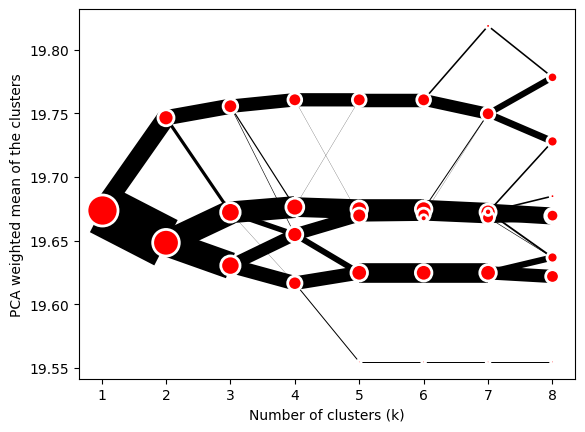

In [61]:
# импортируем библиотеку clustergram
from clustergram import Clustergram

# задаём количество кластеров, для которых хотим получить визуализацию, определяем метод кластеризации
cgram = Clustergram(range(1, 9), method='kmeans')

# запускаем алгоритм
cgram.fit(df[["latitude", "longitude"]])
cgram.plot()

На данном графике мы можем наблюдать, как изменяются данные в ходе кластеризации. Сначала один кластер разделился на два. При этом эти кластеры неравномерные: в нижнем кластере данных существенно больше (так как нижняя линия значительно толще), чем в верхнем. Далее данные делятся на три кластера, при этом количество объектов в двух кластерах примерно одинаковое, а в третьем, верхнем, кластере объектов всё ещё меньше. Таким образом мы можем оценивать равномерность получившихся кластеров.

**3D-ВИЗУАЛИЗАЦИЯ**

In [62]:
# инициализируем k-means-кластеризацию с шестью кластерами
kmeans_clustering = KMeans(n_clusters=6)

# обучим k-means-модель кластеризации на данных широты, долготы и цены, сохраним данные о кластерах для этих данных в kmeans_predictions
kmeans_predictions = kmeans_clustering.fit_predict(df[['latitude', 'longitude', 'price']])

# сохраним предсказания в колонку clusters датафрейма
df["clusters_3d"] = kmeans_predictions

Визуализация с помощью библиотеки Matplotlib:

Text(0.5, 0, 'price')

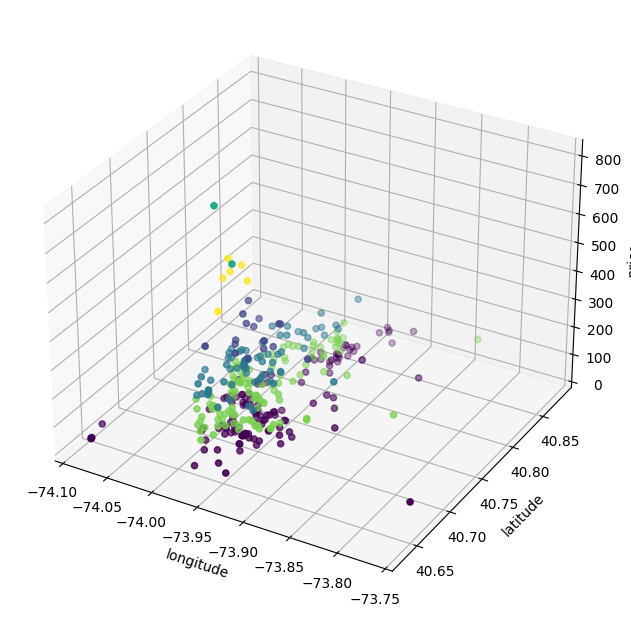

In [67]:
from mpl_toolkits.mplot3d import Axes3D

# создадим трёхмерный объект
fig = plt.figure(figsize=(6,8))
ax = Axes3D(fig)
# добавим дополнительную ось в объект картинки
fig.add_axes(ax)

# визуализируем данные, передав значения x, y, z, а также информацию о группировке данных по цветам
ax.scatter(xs=df.longitude.to_list(), ys=df.latitude.to_list(), zs=df.price.to_list(), c=df.clusters_3d)
# добавим оси
ax.set_xlabel('longitude')
ax.set_ylabel('latitude')
ax.set_zlabel('price')

Чтобы изменить угол обзора, существует два параметра:

* ax.azim — куб будет вращаться слева направо в зависимости от изменения этой величины;
* ax.elev — куб будет вращаться снизу вверх в зависимости от изменения данной величины.

Text(0.5, 0, 'price')

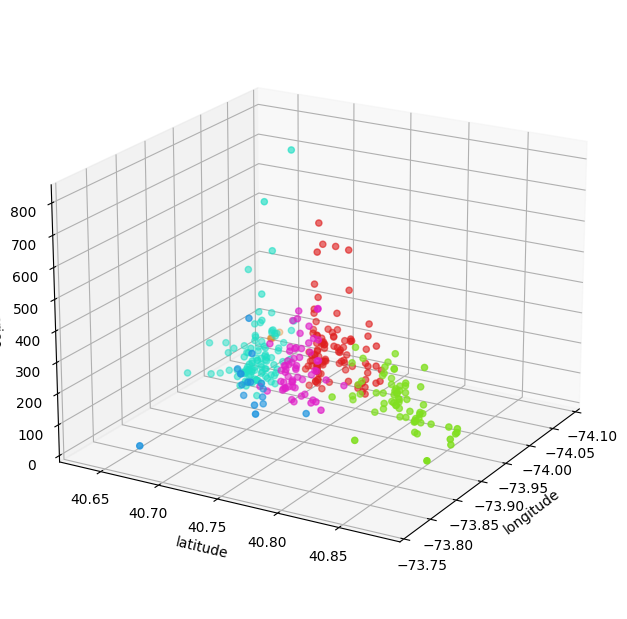

In [69]:
# создаём трёхмерный объект
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig)
# добавляем дополнительную ось в объект картинки
fig.add_axes(ax)

ax.azim = 30
ax.elev = 20

# визуализируем данные, передав значения x, y, z, а также информацию о группировке данных по цветам
ax.scatter(xs=df.longitude.to_list(), ys=df.latitude.to_list(), zs=df.price.to_list(), c=df.color)
# добавляем оси
ax.set_xlabel('longitude')
ax.set_ylabel('latitude')
ax.set_zlabel('price')

In [70]:
import plotly
import plotly.express as px

# передаём датафрейм и поля, которые нужно использовать для осей абсцисс, ординат и аппликат
# в значение color передаём номера кластеров
fig = px.scatter_3d(
    data_frame=df, 
    x = 'longitude', 
    y = 'latitude', 
    z = 'price', 
    color='clusters', 
    width=1000,
    height=700
)

#отображаем график
fig.show()

In [ ]:
#Задание 8.4
#Для датасета Airbnb проведите иерархическую алгомеративную кластеризацию с использованием sklearn. 
# В качестве признаков для кластеризации используйте latitude и longitude из датафрейма, количество кластеров для кластеризации — 6. 
# Расстояние между кластерами рассчитайте методом полной связи, направление дендрограммы — top.

#Визуализируйте дендрограмму для проведённой кластеризации. 
# На сколько кластеров можно разделить датасет, если расстояние между кластерами будет равно 0.25?

In [73]:
agglomerative_clustering = AgglomerativeClustering(n_clusters=6, linkage='complete')

# обучаем модель и получаем результаты кластеризации
predictions_ag_model = agglomerative_clustering.fit_predict(df[['latitude', 'longitude']])

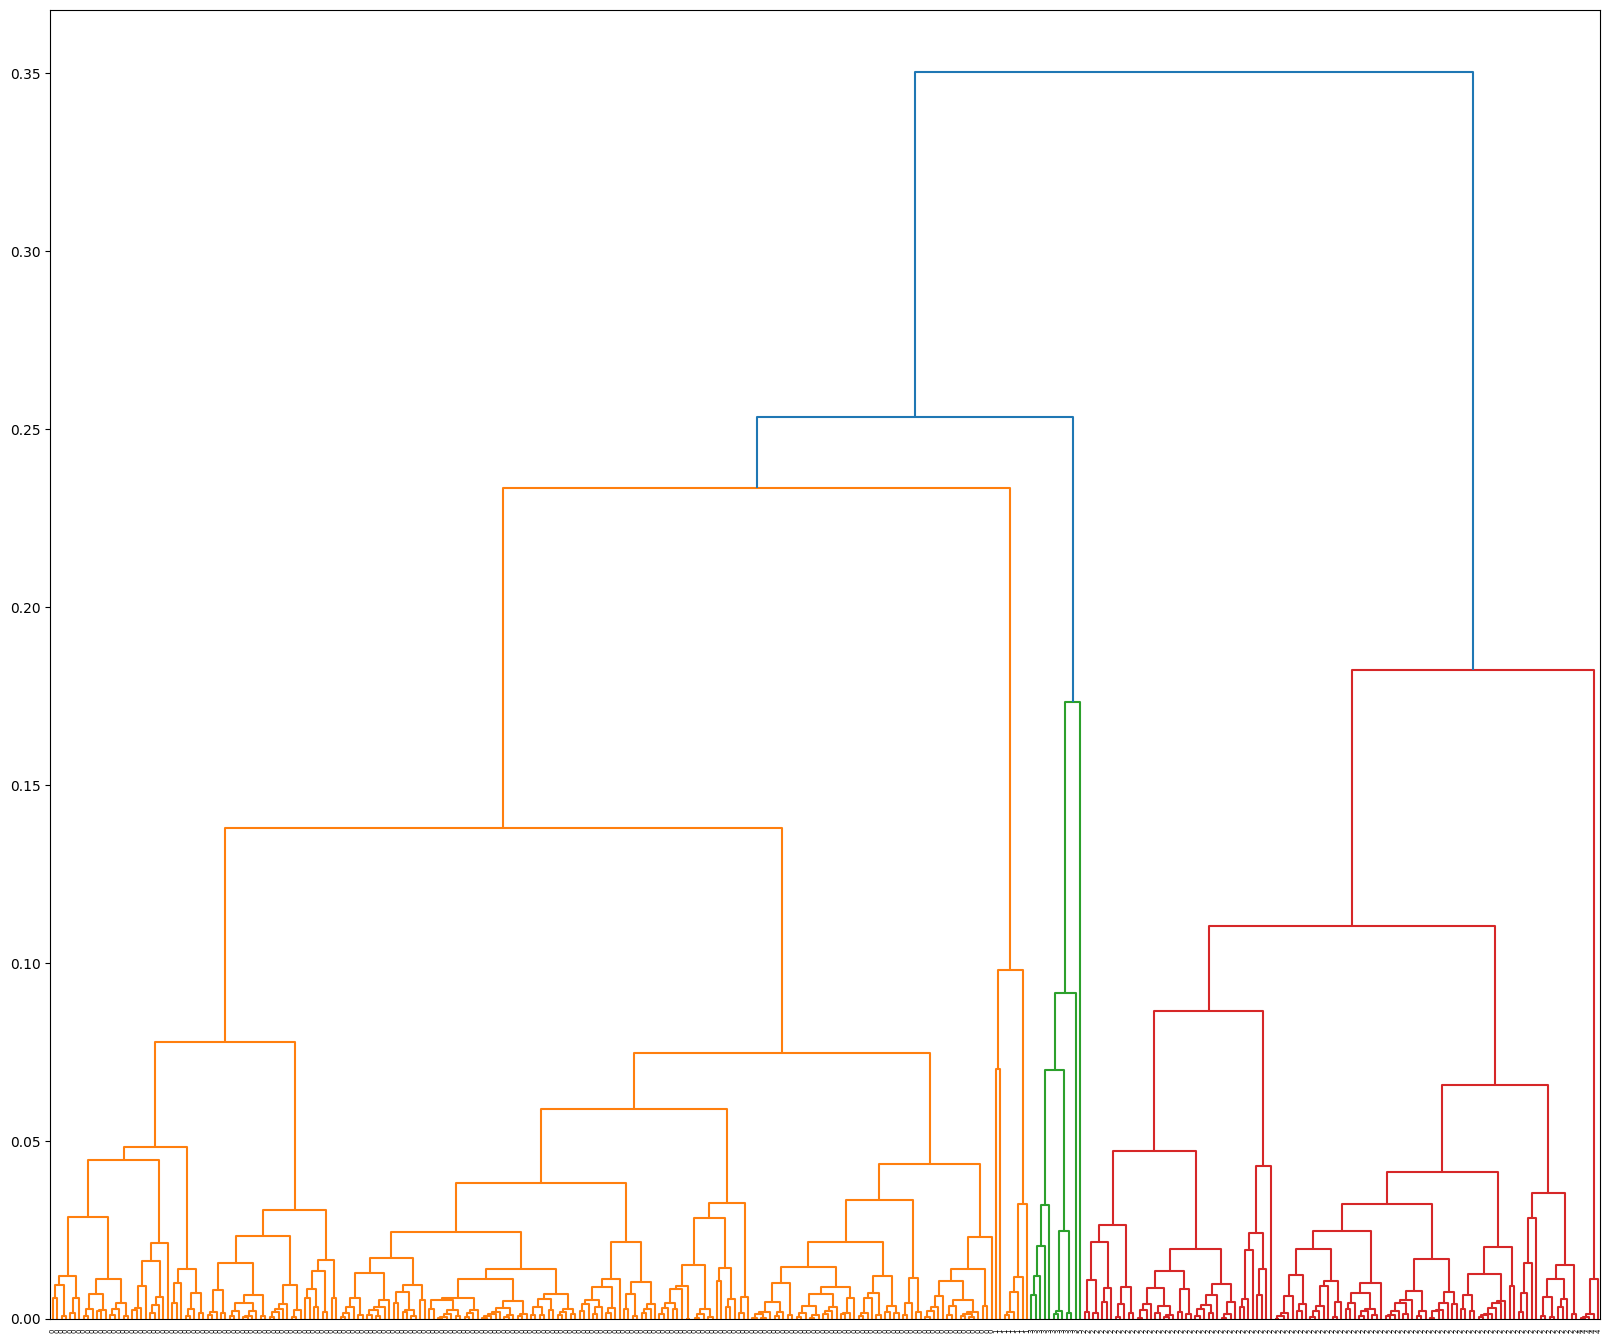

In [74]:
# рассчитаем расстояния между кластерами
linked = linkage(df[["latitude", "longitude"]], 'complete')
plt.figure(figsize=(20, 17))

# визуализируем дендрограмму с ориентацией top
# сначала будут отрисовываться кластеры с минимальным расстоянием между ними
dendrogram(Z=linked,
            orientation='top',
            labels=predictions_ag_model,
            distance_sort='descending')

plt.show()

In [ ]:
#Задание 8.5
#Для датасета Airbnb проведите DBSCAN-кластеризацию. В качестве признаков для кластеризации используйте latitude и longitude. 
# Параметры для алгоритма кластеризации: eps=0.012, min_samples=6.

#Визуализируйте результаты. Сколько кластеров получилось на графике?

<AxesSubplot: xlabel='latitude', ylabel='longitude'>

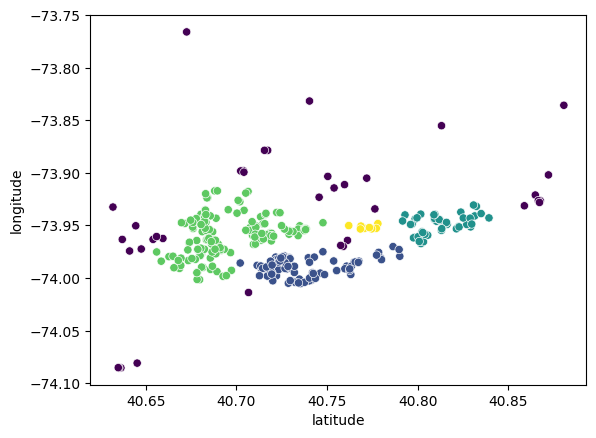

In [75]:
clustering = DBSCAN(eps=0.012, min_samples=6).fit(df[["latitude", "longitude"]])
sns.scatterplot(x=df["latitude"], y=df["longitude"], c=clustering.labels_)

### PCA и t-SNE, или зачем понижать размерность?

Задача снижения размерности — это задача преобразования данных с целью уменьшения количества признаков, которые описывают объект.

Методы снижения размерности могут преобразовывать данные двумя способами:

* линейно,
* нелинейно.

**PCA**

Метод главных компонент, или PCA (Principal Components Analysis) — это один из базовых способов уменьшения размерности.

Данный метод имеет широкое применение:
* Подавление шума на изображениях.
* Индексация видео для быстрого поиска по базе.

Для уменьшения размерности метод главных компонент проводит линейное преобразование пространства, которое сохраняет длины векторов. Таким образом происходит отображение признаков в новое пространство с меньшей размерностью.

В новом пространстве появляются новые оси. Они строятся таким образом, что для первой оси дисперсия данных должна быть максимальной, а вторая ось ортогональна первой и имеет максимально возможную дисперсию.

Первой главной компонентой будет называться первая ось в новом пространстве.

In [76]:
# загрузим датасет MNIST
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

dataset = fetch_openml("mnist_784")
# загрузим признаки в переменную X  
X = dataset['data']
# загрузим «ответы» в переменную y
y = dataset['target']
# разделим данные с помощью sklearn на данные для обучения и теста
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.1, random_state=0)

# импортируем StandardScaler для стандартизации данных
from sklearn.preprocessing import StandardScaler

# создадим объект класса StandardScaler
scaler = StandardScaler()
scaler.fit(train_x)
# трансформируем датасеты train_x и test_x
train_x = scaler.transform(train_x)
test_x = scaler.transform(test_x)

# импортируем класс PCA
from sklearn.decomposition import PCA

# создадим объект класса PCA
pca = PCA(n_components=300)
pca.fit(train_x)
# уменьшим размерность данных
train_x_pca = pca.transform(train_x)
test_x_pca = pca.transform(test_x)

Посмотрим, сколько признаков описывало объект до и после уменьшения размерности. Как мы можем заметить, сначала было 787 признаков, а в конце объект описывают уже 300 главных компонент:

In [77]:
print(len(train_x[0]))
print(len(train_x_pca[0]))

784
300


Обучим модель логистической регрессии, которая на вход будет принимать пиксели изображения и предсказывать, что на нём нарисовано.

Напишем функцию, которая будет принимать на вход данные для обучения (матрицу с признаками и правильные ответы) и данные для тестирования модели, а на выходе будет возвращать время, затраченное на обучение модели, и качество модели. В качестве метрики оценивания качества будем использовать метрику accuracy.

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# напишем функцию, которая на вход принимает X и y, а возвращает модель и время
def get_time_and_accuracy(train_x, train_y, test_x, test_y):
    # создадим объект класса LogisticRegression
    log_reg_model = LogisticRegression(max_iter=1000)
    from time import time
    # запишем время с начала эпохи в секундах до обучения модели
    start_time = time()
    # обучим модель
    log_reg_model.fit(train_x, train_y)    
    # запишем время с начала эпохи в секундах после обучения
    end_time = time()
    # подсчитаем время, потраченное на обучение модели
    time = end_time-start_time
    # предскажем на тестовых данных
    y_pred = log_reg_model.predict(test_x)
    # посчитаем скор для тестового предсказания
    score = accuracy_score(test_y, y_pred)
    # вернём время, потраченное на обучение, и качество полученной модели
    return time, score

model_pca_time, model_pca_acc = get_time_and_accuracy(train_x_pca, train_y, test_x_pca, test_y)
print(f"Модель, построенная на признаках, полученных после уменьшения размерности. Время обучения {model_pca_time}, метрика модели {model_pca_acc}")
# Модель, построенная на признаках, полученных после уменьшения размерности. Время обучения 54.12072825431824, метрика модели 0.9255714285714286

model_time, model_acc = get_time_and_accuracy(train_x, train_y, test_x, test_y)
print(f"Модель, построенная на всех исходных признаках. Время обучения {model_time}, метрика модели {model_acc}")

Модель, построенная на признаках, полученных после уменьшения размерности. Время обучения 126.00561809539795, метрика модели 0.9252857142857143
Модель, построенная на всех исходных признаках. Время обучения 378.22078251838684, метрика модели 0.9187142857142857


**T-SNE**

Для того чтобы визуализировать многомерное пространство признаков, необходимо уменьшить его размерность до двухмерного или трёхмерного. В этом поможет t-SNE (t-distributed Stochastic Neighbor Embedding), что переводится с английского как «стохастическое вложение соседей с t-распределением». 

t-SNE, в отличие от PCA, использует технику нелинейного снижения размерности данных. Обычно используется снижение размерности многомерного пространства до двух- или трёхмерного с целью дальнейшей визуализации. При преобразовании похожие объекты оказываются рядом, а непохожие — далеко друг от друга.

Уменьшим размерность с помощью PCA:

<AxesSubplot: xlabel='0', ylabel='1'>

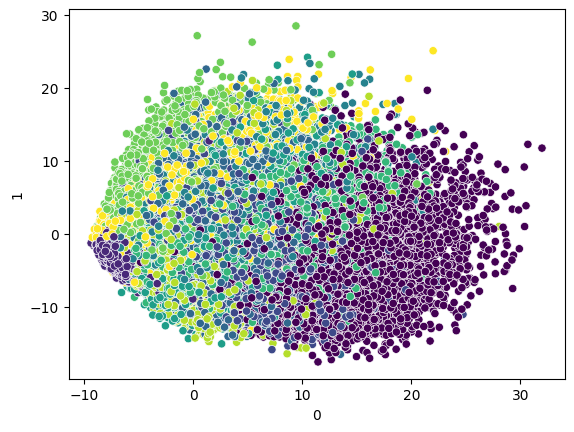

In [79]:
import seaborn as sns

# создадим объект класса PCA, уменьшим размерность данных до 2
pca = PCA(n_components=2, random_state=42)

# уменьшим размерность данных
X_reduced = pca.fit_transform(train_x)
# сохраним данные в датафрейм
df_pca = pd.DataFrame(X_reduced)
# сохраним разметки кластеров
df_pca['c'] = pd.to_numeric(train_y).astype('Int64').to_list()
# визуализируем
sns.scatterplot(x=df_pca[0], y=df_pca[1], c=df_pca['c'])

Уменьшим размерность с помощью t-SNE:

c:\Users\killr\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

c:\Users\killr\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



<AxesSubplot: xlabel='0', ylabel='1'>

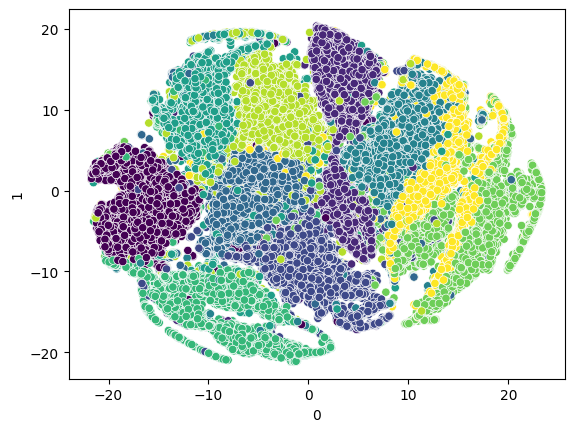

In [81]:
from sklearn.manifold import TSNE
# создадим объект класса TSNE, уменьшим размерность данных до 2
tsne = TSNE(n_components=2, perplexity=50, n_iter=500, random_state=42)
# немного уменьшим количество объектов для уменьшения размерности, иначе алгоритм будет работать очень долго
X_reduced = tsne.fit_transform(train_x)
# сохраним данные в датафрейм
df_tsne = pd.DataFrame(X_reduced)
# сохраним разметки кластеров
df_tsne['c'] = pd.to_numeric(train_y).astype('Int64').to_list()
sns.scatterplot(x=df_tsne[0], y=df_tsne[1], c=df_tsne['c'])